In [1]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
X, y, coefficients = make_regression(
    n_samples=50,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=5,
    coef=True,
    random_state=1
)

In [3]:
n = X.shape[1]
r = np.linalg.matrix_rank(X)

In [4]:
U, sigma, VT = np.linalg.svd(X, full_matrices=False)

In [5]:
D_plus = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))

In [6]:
V = VT.T

In [7]:
X_plus = V.dot(D_plus).dot(U.T)

In [8]:
w = X_plus.dot(y)

In [9]:
error = np.linalg.norm(X.dot(w) - y, ord=2) ** 2

In [10]:
np.linalg.lstsq(X, y)

<ipython-input-10-4dff74329d00>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(X, y)


(array([89.22901347]), array([888.96370014]), 1, array([6.85840501]))

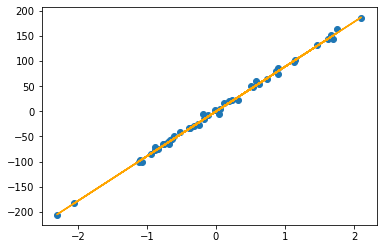

In [11]:
plt.scatter(X, y)
plt.plot(X, w*X, c='orange')

In [12]:
lr = LinearRegression()
lr.fit(X, y)
w = lr.coef_[0]

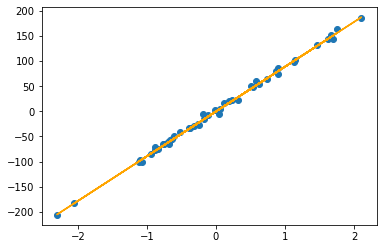

In [14]:
plt.scatter(X, y)
plt.plot(X, w*X, c='orange')